In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

Homework 1
==========
Run-and-tumble in a 1D concentration profile
--------------------------------------------

In [2]:
# Random Walk Code Given

class RandomWalk1D():
    """
    simulate random walk of a particle in 1D.
    """

    def __init__(self, dt=1., speed=1.):
        """
        initialize the simulation by setting the initial position of the particle.
        inputs:
        dt: float, time step size.
        speed: float, each time step the particle moves a distance dx=dt*speed.
        """
        self.dt = dt
        self.dx = dt * speed
        self.t = 0.    # current time since the beginning of the simulation
        self.x = 0.    # current position of the particle

    def run(self, T):
        """
        run the simulation until time T (total time since the very beginning). By defining the argument `T` this way,
        we can pick up the simulation where we left last time and continue to run it further.
        inputs:
        T: int, total amount of time since the beginning of simulation.
        """
        n = int((T - self.t) / self.dt)    # number of time steps needed to simulate
        for t in range(n):
            direction = np.random.rand()    # draw a random number uniformly from between 0 and 1
            if direction < 0.5:    # move left
                self.x = self.x - self.dx
            else:    # move right
                self.x = self.x + self.dx
            self.t = self.t + self.dt    # keep track of time since the beginning of the simulation

Consider the 1D run-and-tumble model as in the notebook [run-and-tumble.ipynb](./run-and-tumble.ipynb). What happens if the concentration profile is not simply a linear function? For example, let us place a food source at $x=500$, so that the concentration is peaked there and decreases with distance.

1. Choose a reasonable function to describe the concentration profile. Define it as a Python function that can be passed to the `run` method of the `RunTumble1D` class. Make sure that the function has appreciable gradient at $x=0$.

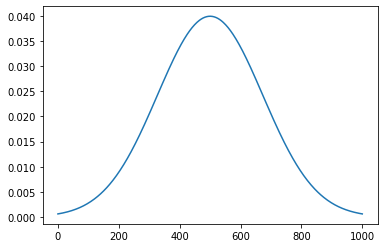

In [30]:
def concentration(x_peak = 500, diff_const = 50, t_const = 300):
    x = np.linspace(0, x_peak * 2, 500)
    peak = (1 / np.sqrt((4 * np.pi * diff_const))) * np.exp((-((x_peak - x) ** 2)) / (4 * diff_const * t_const))
    plt.plot(x, peak)
    plt.show()
concentration()

My reasoning for the concentration function here is in that in the same way bacteria moving (mostly) randomly diffuse,
some substance with a diffusion constant and over a given time would have the same pattern as the Gaussian, since at any
time, particles (of whatever the food source is) will on average be closer to the center/peak of concentration.
It's like if you put a drop of dye in water, it'll spread out radially

2. Start simulations of a population of bacteria from the origin and run for a sufficiently long time. Choose a set of times points, calculate the mean and variance of the distribution of their positions at these time points. Plot the mean and variance as functions of time, and describe the trends that you see.

In [3]:
N = 10000    # number of simulations to run
T = 1000    # amount of time to run
results = []    # collect results from every simulation
for n in range(N):
    rw1 = RandomWalk1D()
    rw1.run(T)
    results.append(rw1.x)
nbins = 20    # number of bins to use
plt.figure()
plt.hist(results, bins=nbins)
plt.xlabel('x')
plt.ylabel('count')
plt.show()


3. Did the distribution reach a steady state? For that to happen, the mean and variance should both approach constant values. (What value do you expect the mean to approach?) If not, it means you have not run the simulations for long enough. In that case, repeat steps 2 for a longer time.

4. Plot the distribution of their final positions. Describe the shape of the distribution. Does it look like a Gaussian distribution? (It does not have to, depending on the concentration profile you chose.) Try plotting a Gaussian distribution with the same mean and variance as your distribution, and see if it fits.

5. (optional) How does your result depend on the parameter `alpha`? Change its value and repeat the above steps to see how your result will be affected.